# Gym Environment

In [1]:
%pip install -U "gym==0.26.2" # -U flag stands for Upgrade
import numpy as np
import gym
import random

In [2]:
from gym import envs
print('\n'.join([str(env) for env in envs.registry]))

CartPole-v0
CartPole-v1
MountainCar-v0
MountainCarContinuous-v0
Pendulum-v1
Acrobot-v1
LunarLander-v2
LunarLanderContinuous-v2
BipedalWalker-v3
BipedalWalkerHardcore-v3
CarRacing-v2
Blackjack-v1
FrozenLake-v1
FrozenLake8x8-v1
CliffWalking-v0
Taxi-v3
Reacher-v2
Reacher-v4
Pusher-v2
Pusher-v4
InvertedPendulum-v2
InvertedPendulum-v4
InvertedDoublePendulum-v2
InvertedDoublePendulum-v4
HalfCheetah-v2
HalfCheetah-v3
HalfCheetah-v4
Hopper-v2
Hopper-v3
Hopper-v4
Swimmer-v2
Swimmer-v3
Swimmer-v4
Walker2d-v2
Walker2d-v3
Walker2d-v4
Ant-v2
Ant-v3
Ant-v4
Humanoid-v2
Humanoid-v3
Humanoid-v4
HumanoidStandup-v2
HumanoidStandup-v4


In [3]:
#@ creating an environment for chosen games:
env=gym.make('FrozenLake-v1', is_slippery=False, render_mode='rgb_array')
env.reset()

(0, {'prob': 1})

array([[[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]],

       [[180, 200, 230],
        [204, 230, 255],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       ...,

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [235, 245, 249],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]]], dtype=uint8)
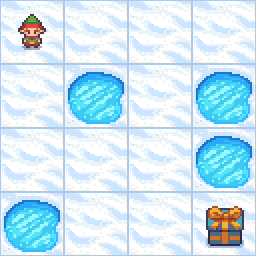

In [4]:
#@ inspection
env.render()

In [5]:
#@ Printing the size of the number of states in the game:
print('Number of states:', env.observation_space.n)
print('Number of possible action:', env.action_space.n)

Number of states: 16
Number of possible action: 4


In [6]:
env.action_space.sample()

2

In [7]:
env.reset()

(0, {'prob': 1})

In [9]:
env.step(env.action_space.sample())

(4, 0.0, False, False, {'prob': 1.0})

# Building Q-table

In [10]:
%pip install torch-snippets "gym==0.26.2"
import numpy as np
import gym
import random

In [12]:
#@ Initialization Q-Table with zeros:

action_size=env.action_space.n
state_size=env.observation_space.n
qtable=np.zeros((state_size, action_size))
qtable

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [13]:
episode_rewards=[]
for i in range(10000):
  state, *_=env.reset()

  total_rewards=0
  for step in range(50):
    action=env.action_space.sample()
    new_state, reward, done, *_=env.step(action)

    #updating qtable
    qtable[state, action]+=0.1*(reward+0.9*np.max(qtable[new_state, :])- qtable[state, action])

    state=new_state
    total_rewards+=reward

  episode_rewards.append(total_rewards)
print(qtable)

[[0.53144055 0.59048943 0.59048951 0.53144055]
 [0.53144053 0.         0.65609947 0.5904895 ]
 [0.59048947 0.72899944 0.59048932 0.65609942]
 [0.65609934 0.         0.59048921 0.59048929]
 [0.59048939 0.65609939 0.         0.53144053]
 [0.         0.         0.         0.        ]
 [0.         0.80999945 0.         0.65609907]
 [0.         0.         0.         0.        ]
 [0.65609932 0.         0.72899936 0.59048928]
 [0.65609882 0.8099985  0.80999944 0.        ]
 [0.72899806 0.89999967 0.         0.72899892]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.80999536 0.89999893 0.72899609]
 [0.80989049 0.89999602 0.99999986 0.809996  ]
 [0.         0.         0.         0.        ]]
